Suha Lee <br>
1005155626 <br>
Last updated: 23-03-2024

INF2178 Technical Assignment 3 - Code

In [ ]:
# Required imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%pip install -q dfply
from dfply import *
%pip install -q bioinfokit
from bioinfokit.analys import stat
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

Loading and Preprocessing Data

In [ ]:
# Set filepath to dataset
filepath = '/content/drive/MyDrive/2023 2024 Semester 2/INF2178/A3/INF2178_A3_data.csv'

# Load dataset into dataframe
scores_data = pd.read_csv(filepath)
scores_data.head()

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,totalhouseholdincome,incomeinthousands,incomegroup
0,36.58,39.54,33.822,49.37,50.10,40.533,140000.0,140.0,3
1,50.82,44.44,38.147,83.50,58.93,37.409,120000.0,120.0,3
2,40.68,28.57,28.108,40.41,32.81,29.312,90000.0,90.0,3
3,32.57,23.57,15.404,34.14,35.25,27.382,50000.0,50.0,2
4,31.98,19.65,18.727,32.84,23.60,26.977,55000.0,55.0,2


In [ ]:
# Display dataframe summary
scores_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11933 entries, 0 to 11932
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   fallreadingscore             11933 non-null  float64
 1   fallmathscore                11933 non-null  float64
 2   fallgeneralknowledgescore    11933 non-null  float64
 3   springreadingscore           11933 non-null  float64
 4   springmathscore              11933 non-null  float64
 5   springgeneralknowledgescore  11933 non-null  float64
 6   totalhouseholdincome         11933 non-null  float64
 7   incomeinthousands            11933 non-null  float64
 8   incomegroup                  11933 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 839.2 KB


The dataset contains 11933 observations of 9 features each. None of the rows contain null values, and so we proceed without additional preprocessing.

Exploratory Data Analysis

While information on how incomegroup was derived is not included in the dataset, we can approximate the rules by identifying the boundaries between the groups.

In [ ]:
# Identify range of income values for each incomegroup class
income_ranges = scores_data.groupby('incomegroup')['totalhouseholdincome'].agg(['min', 'max'])
income_ranges

,min,max
incomegroup,,
1,1.0,39800.0
2,40000.0,69700.0
3,70000.0,150000.0


Income Group 1: < 40000 <br>
Income Group 2: >= 40000, < 70000 <br>
Income Group 3: >= 70000

Examining class distribution of incomegroup:

In [ ]:
# Count frequency of each incomegroup class
incomegroup_counts = scores_data['incomegroup'].value_counts().reset_index()
incomegroup_counts.columns = ['incomegroup', 'count']
incomegroup_counts

,incomegroup,count
0,1,4729
1,2,3726
2,3,3478


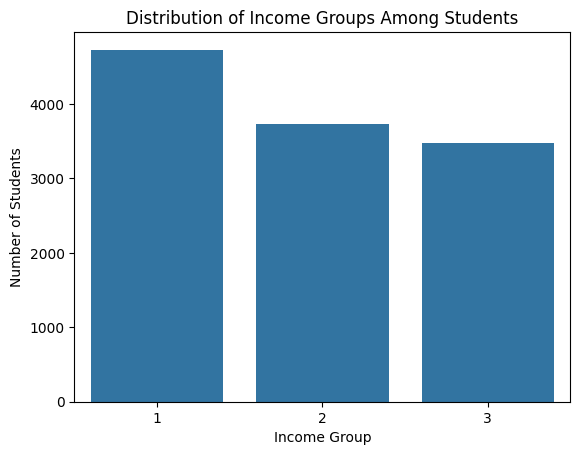

In [ ]:
# Plot bargraph of incomegroup class distribution
sns.barplot(x='incomegroup', y='count', data=incomegroup_counts, order=incomegroup_counts['incomegroup'])
plt.xlabel('Income Group')
plt.ylabel('Number of Students')
plt.title('Distribution of Income Groups Among Students')
plt.show()

We observe a fairly equal distribution, slightly skewed towards the lower income groups

We are interested in investigating the net differences in academic scores over the course of the year. To do so, we calculate the difference in scores between the Fall and Spring semesters.

In [ ]:
# Calculate difference in scores over time for each subject
scores_data['changereadingscore'] = scores_data['springreadingscore'] - scores_data['fallreadingscore']
scores_data['changemathscore'] = scores_data['springmathscore'] - scores_data['fallmathscore']
scores_data['changegeneralknowledgescore'] = scores_data['springgeneralknowledgescore'] - scores_data['fallgeneralknowledgescore']
scores_data.head()

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,totalhouseholdincome,incomeinthousands,incomegroup,changereadingscore,changemathscore,changegeneralknowledgescore
0,36.58,39.54,33.822,49.37,50.10,40.533,140000.0,140.0,3,12.79,10.56,6.711
1,50.82,44.44,38.147,83.50,58.93,37.409,120000.0,120.0,3,32.68,14.49,-0.738
2,40.68,28.57,28.108,40.41,32.81,29.312,90000.0,90.0,3,-0.27,4.24,1.204
3,32.57,23.57,15.404,34.14,35.25,27.382,50000.0,50.0,2,1.57,11.68,11.978
4,31.98,19.65,18.727,32.84,23.60,26.977,55000.0,55.0,2,0.86,3.95,8.250


In [ ]:
# Display summary statistics for continous variables
scores_data.drop('incomegroup', axis=1).describe()

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,totalhouseholdincome,incomeinthousands,changereadingscore,changemathscore,changegeneralknowledgescore
count,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000
mean,35.954215,27.128244,23.073694,47.511178,37.799461,28.235584,54317.199930,54.317200,11.556963,10.671218,5.161890
std,10.473130,9.120505,7.396978,14.327111,12.027753,7.577457,36639.061147,36.639061,8.085004,6.855263,4.054906
min,21.010000,10.510000,6.985000,22.350000,11.900000,7.858000,1.000000,0.001000,-44.760000,-22.160000,-14.183000
25%,29.340000,20.680000,17.385000,38.950000,29.270000,22.802000,27000.000000,27.000000,6.470000,6.010000,2.472000
50%,34.060000,25.680000,22.954000,45.320000,36.410000,28.583000,47000.000000,47.000000,10.400000,9.860000,5.047000
75%,39.890000,31.590000,28.305000,51.770000,44.220000,33.782000,72000.000000,72.000000,15.150000,14.330000,7.781000
max,138.510000,115.650000,47.691000,156.850000,113.800000,48.345000,150000.000000,150.000000,91.940000,75.350000,27.785000


In [ ]:
# Display summary statistics for Fall reading scores by incomegroup
scores_data >> group_by(X.incomegroup) >> summarize(n=X['fallreadingscore'].count(), mean=X['springreadingscore'].mean(), std=X['springreadingscore'].std())

,incomegroup,n,mean,std
0,1,4729,43.665077,12.004821
1,2,3726,48.009450,13.505020
2,3,3478,52.206880,16.450153


In [ ]:
# Display summary statistics for Fall math scores by incomegroup
scores_data >> group_by(X.incomegroup) >> summarize(n=X['fallmathscore'].count(), mean=X['springmathscore'].mean(), std=X['springmathscore'].std())

,incomegroup,n,mean,std
0,1,4729,33.883051,10.734653
1,2,3726,38.464691,11.359349
2,3,3478,42.411898,12.605759


In [ ]:
# Display summary statistics for net change in reading scores by incomegroup
scores_data >> group_by(X.incomegroup) >> summarize(n=X['changereadingscore'].count(), mean=X['changereadingscore'].mean(), std=X['changereadingscore'].std())

,incomegroup,n,mean,std
0,1,4729,10.878279,7.462176
1,2,3726,11.716932,7.906122
2,3,3478,12.308387,8.967606


In [ ]:
# Display summary statistics for net change in math scores by incomegroup
scores_data >> group_by(X.incomegroup) >> summarize(n=X['changemathscore'].count(), mean=X['changemathscore'].mean(), std=X['changemathscore'].std())

,incomegroup,n,mean,std
0,1,4729,9.958547,6.406540
1,2,3726,10.896224,6.853736
2,3,3478,11.399178,7.339003


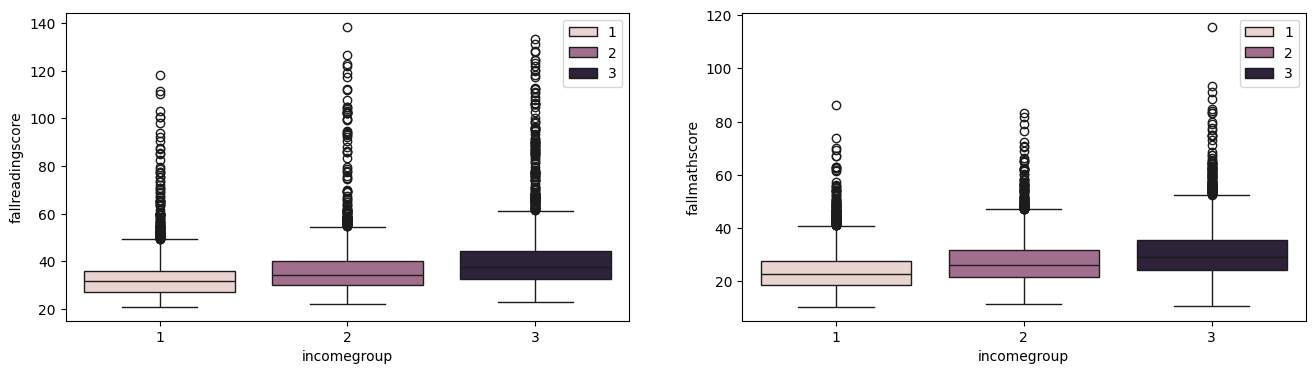

In [ ]:
# Plot boxplots of Fall academic scores by income group
fig, axs = plt.subplots(ncols=2, figsize=(16, 4))
sns.boxplot(data=scores_data, x='incomegroup', y='fallreadingscore', hue=scores_data.incomegroup.tolist(), ax=axs[0])
sns.boxplot(data=scores_data, x='incomegroup', y='fallmathscore', hue=scores_data.incomegroup.tolist(), ax=axs[1])
plt.show()

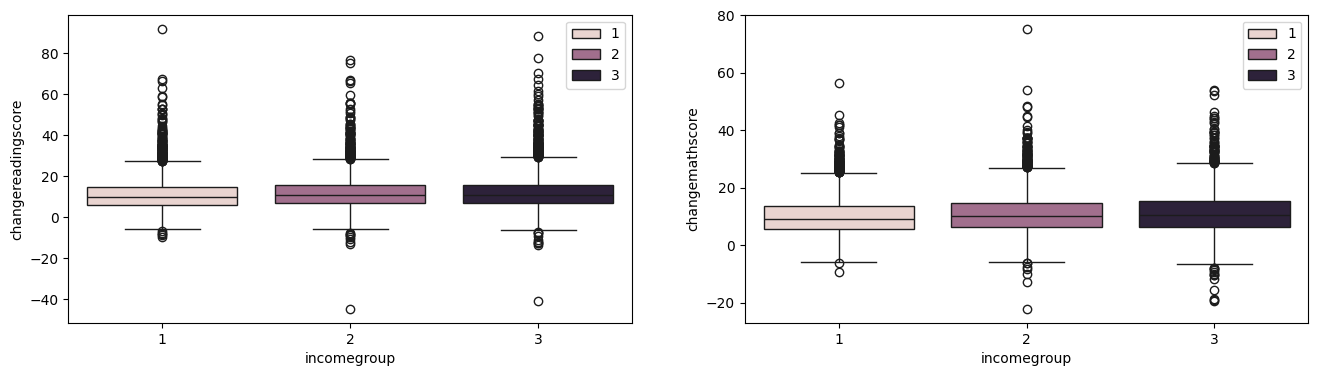

In [ ]:
# Plot boxplots of net change in academic scores by income group
fig, axs = plt.subplots(ncols=2, figsize=(16, 4))
sns.boxplot(data=scores_data, x='incomegroup', y='changereadingscore', hue=scores_data.incomegroup.tolist(), ax=axs[0])
sns.boxplot(data=scores_data, x='incomegroup', y='changemathscore', hue=scores_data.incomegroup.tolist(), ax=axs[1])
plt.show()

Performing One-way ANCOVA Tests

Comparing Fall reading scores by income group, when accounting for general knowledge

In [ ]:
# Perform the ANCOVA
model = ols('fallreadingscore ~ incomegroup + fallgeneralknowledgescore', data=scores_data).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       fallreadingscore   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     1984.
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        01:59:47   Log-Likelihood:                -43247.
No. Observations:               11933   AIC:                         8.650e+04
Df Residuals:                   11930   BIC:                         8.652e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [ ]:
# Perform Kolomogorov-Smirnov test
residuals = model.resid
ks_statistic, p_value = stats.kstest(residuals, 'norm', args=(residuals.mean(), residuals.std()))
print(ks_statistic, p_value)

0.10308264962960612 7.483777774874199e-111


In [ ]:
# Perform Levene test
res = stat()
res.levene(df=scores_data, res_var='fallreadingscore', xfac_var='incomegroup')
res.levene_summary

,Parameter,Value
0,Test statistics (W),84.7898
1,Degrees of freedom (Df),2.0000
2,p value,0.0000


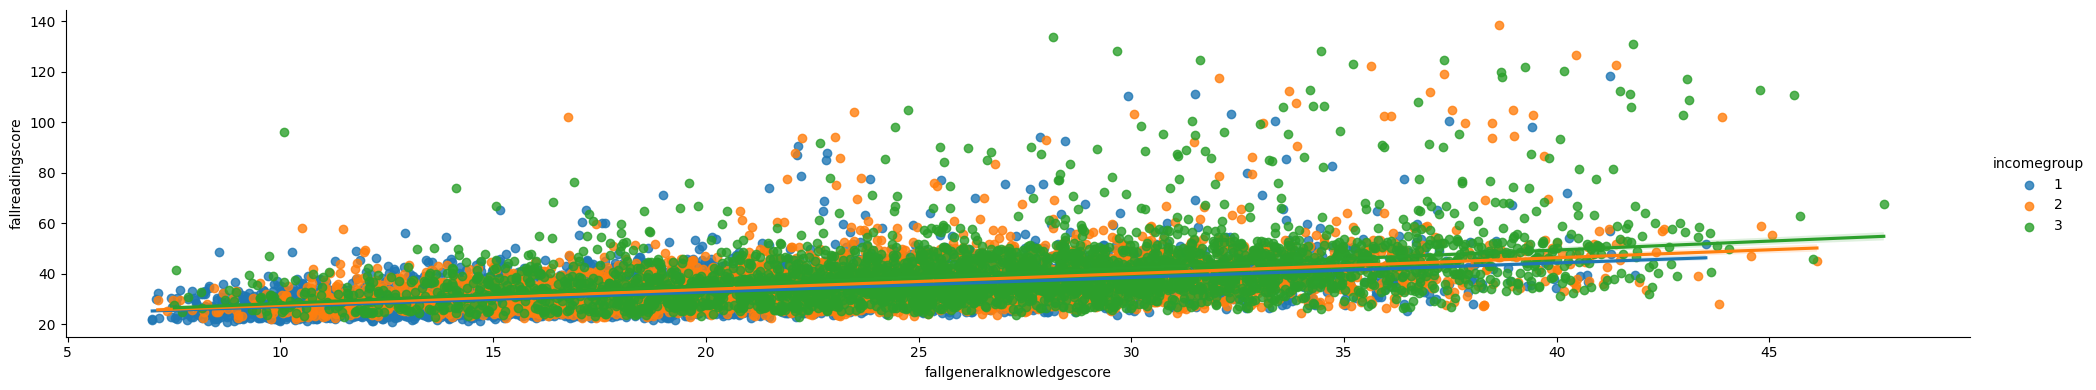

In [ ]:
# Plot interaction between general knowledge and Fall reading scores
sns.lmplot(data=scores_data, x='fallgeneralknowledgescore', y='fallreadingscore', hue='incomegroup', height=4, aspect=5)

Comparing Fall math scores by income group, when accounting for general knowledge

In [ ]:
# Perform the ANCOVA
model = ols('fallmathscore ~ incomegroup + fallgeneralknowledgescore', data=scores_data).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          fallmathscore   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     3619.
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        01:59:51   Log-Likelihood:                -40481.
No. Observations:               11933   AIC:                         8.097e+04
Df Residuals:                   11930   BIC:                         8.099e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [ ]:
# Perform Kolomogorov-Smirnov test
residuals = model.resid
ks_statistic, p_value = stats.kstest(residuals, 'norm', args=(residuals.mean(), residuals.std()))
print(ks_statistic, p_value)

0.06731881414918561 1.833185327501636e-47


In [ ]:
# Perform Levene test
res = stat()
res.levene(df=scores_data, res_var='fallmathscore', xfac_var='incomegroup')
res.levene_summary

,Parameter,Value
0,Test statistics (W),67.9093
1,Degrees of freedom (Df),2.0000
2,p value,0.0000


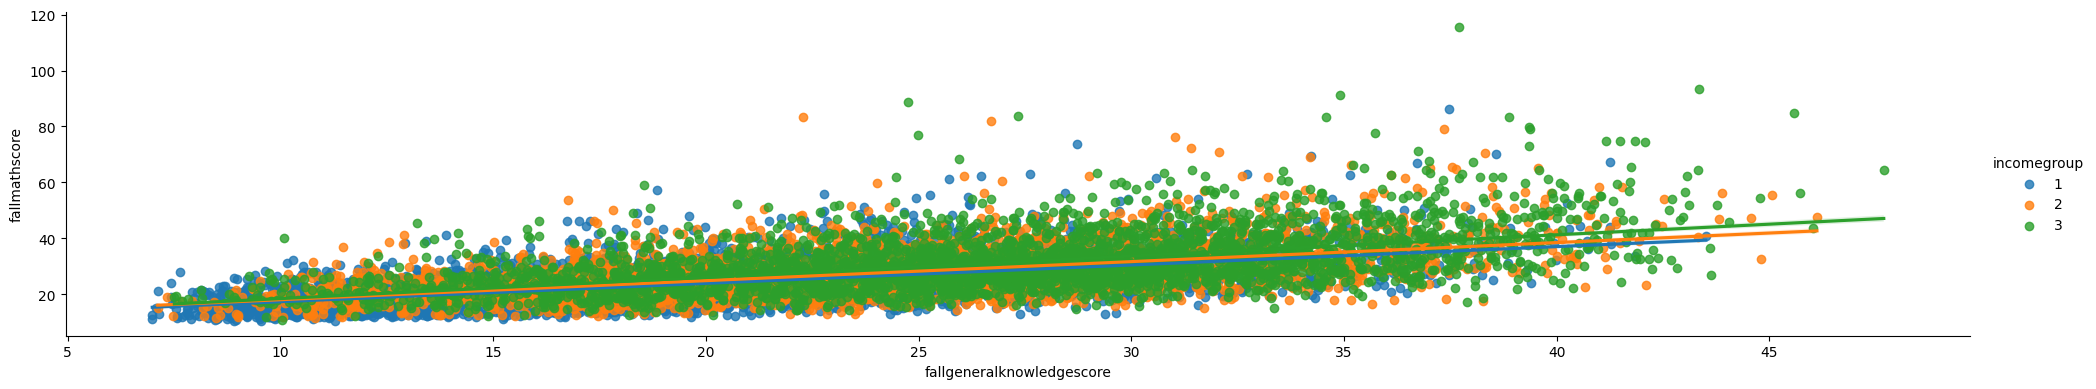

In [ ]:
# Plot interaction between general knowledge and Fall math scores
sns.lmplot(data=scores_data, x='fallgeneralknowledgescore', y='fallmathscore', hue='incomegroup', height=4, aspect=5)

Comparing net change in reading scores by income group, when accounting for general knowledge

In [ ]:
# Perform the ANCOVA
model = ols('changereadingscore ~ incomegroup + changegeneralknowledgescore', data=scores_data).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     changereadingscore   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     119.3
Date:                Sun, 24 Mar 2024   Prob (F-statistic):           5.12e-52
Time:                        01:59:57   Log-Likelihood:                -41754.
No. Observations:               11933   AIC:                         8.351e+04
Df Residuals:                   11930   BIC:                         8.354e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [ ]:
# Perform Kolomogorov-Smirnov test
residuals = model.resid
ks_statistic, p_value = stats.kstest(residuals, 'norm', args=(residuals.mean(), residuals.std()))
print(ks_statistic, p_value)

0.08178710129872335 6.969314309060368e-70


In [ ]:
# Perform Levene test
res = stat()
res.levene(df=scores_data, res_var='changereadingscore', xfac_var='incomegroup')
res.levene_summary

,Parameter,Value
0,Test statistics (W),19.728
1,Degrees of freedom (Df),2.000
2,p value,0.000


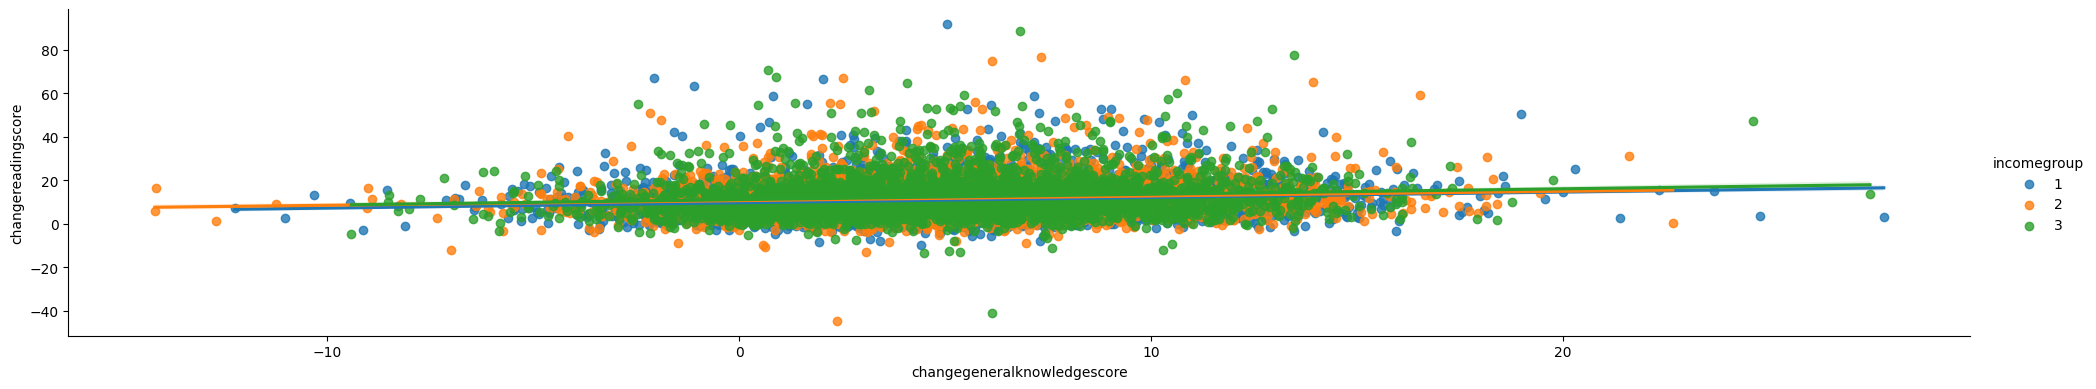

In [ ]:
# Plot interaction between net changes in general knowledge and reading scores
sns.lmplot(data=scores_data, x='changegeneralknowledgescore', y='changereadingscore', hue='incomegroup', height=4, aspect=5)

Comparing net change in math scores by income group, when accounting for general knowledge

In [ ]:
# Perform the ANCOVA
model = ols('changemathscore ~ incomegroup + changegeneralknowledgescore', data=scores_data).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        changemathscore   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     179.4
Date:                Sun, 24 Mar 2024   Prob (F-statistic):           1.75e-77
Time:                        02:00:02   Log-Likelihood:                -39726.
No. Observations:               11933   AIC:                         7.946e+04
Df Residuals:                   11930   BIC:                         7.948e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [ ]:
# Perform Kolomogorov-Smirnov test
residuals = model.resid
ks_statistic, p_value = stats.kstest(residuals, 'norm', args=(residuals.mean(), residuals.std()))
print(ks_statistic, p_value)

0.05605681247907279 4.924760997760934e-33


In [ ]:
# Perform Levene test
res = stat()
res.levene(df=scores_data, res_var='changemathscore', xfac_var='incomegroup')
res.levene_summary

,Parameter,Value
0,Test statistics (W),22.2152
1,Degrees of freedom (Df),2.0000
2,p value,0.0000


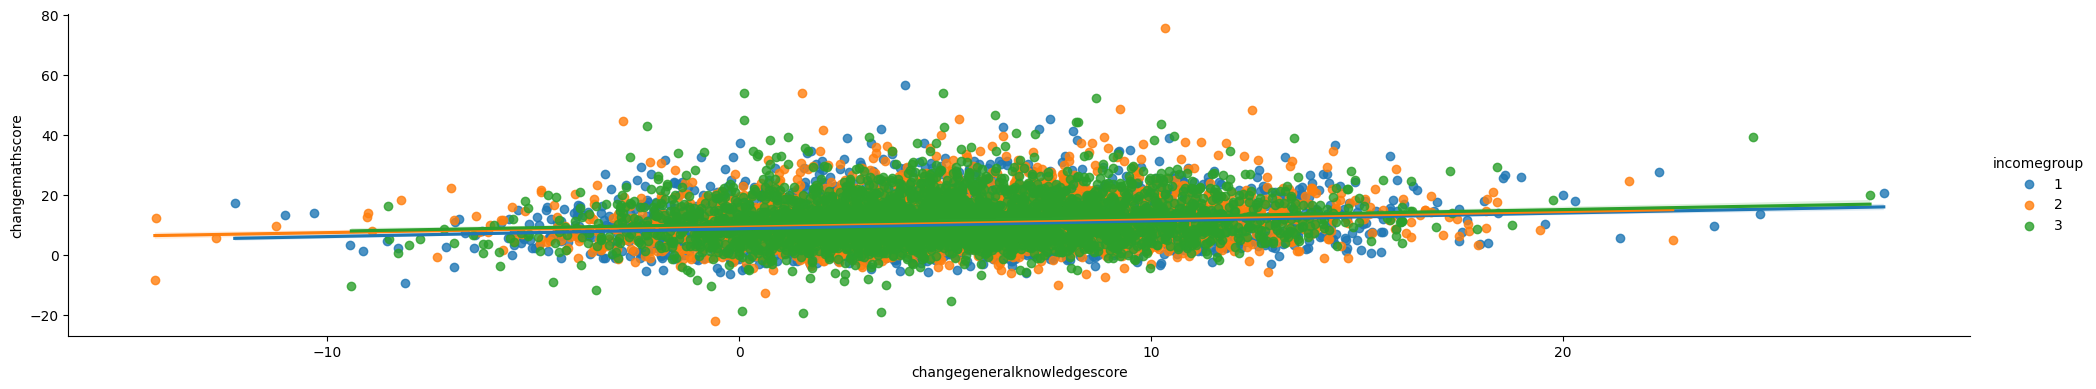

In [ ]:
# Plot interaction between net changes in general knowledge and math scores
sns.lmplot(data=scores_data, x='changegeneralknowledgescore', y='changemathscore', hue='incomegroup', height=4, aspect=5)